In [43]:
from gelquant import gelquant
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

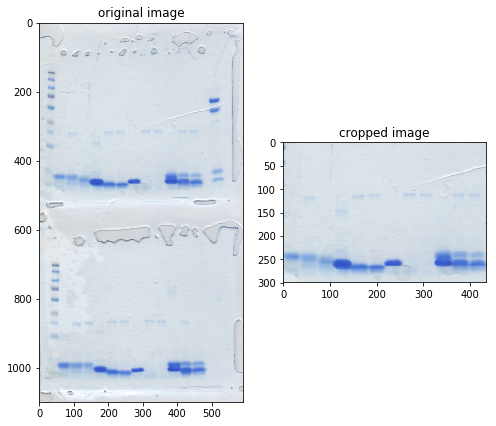

In [9]:
image1 = gelquant.image_cropping("180224_hA12_hA7_hA8_hHD_PK_proteolysis_+ca.png", 40, 200, 475, 500)

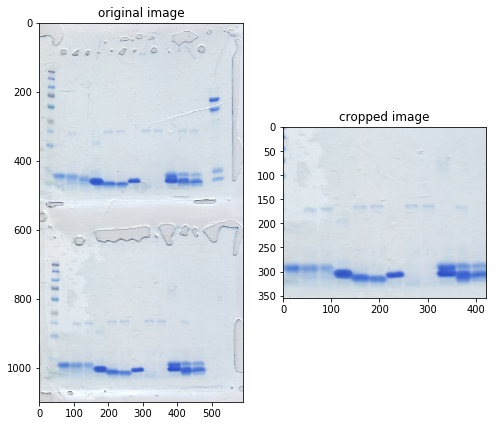

In [15]:
image2 = gelquant.image_cropping("180224_hA12_hA7_hA8_hHD_PK_proteolysis_+ca.png", 53, 700, 475, 1055)

In [16]:
data1, bounds1 = gelquant.lane_parser(image1, 12, 4, 175, 200, plot_output=False)
data2, bounds2 = gelquant.lane_parser(image2, 12, 4, 200, 250, plot_output=False)

Done.
Done.


In [17]:
percentages1 = gelquant.area_integrator(data1, bounds1, 4)
percentages2 = gelquant.area_integrator(data2, bounds2, 4)

In [71]:
def summary_plotter(datasets, labels, colorlist):

    plt.figure(figsize=(10,5))
    df = pd.DataFrame(datasets, columns=labels)
    plt.bar(range(len(df.columns)), df.mean(), align='center', yerr=df.std(), color=colorlist)
    plt.xticks(range(len(df.columns)), df.columns, rotation=70, fontsize=14)
    plt.plot([-1,int(len(df.columns))], [100, 100], "k--")
    plt.ylim(0,120)
    plt.title("Proteolytic susceptibility of calgranulin complexes", fontsize=20)
    plt.ylabel("% remaining after PK treatment", fontsize=16)
    plt.xlabel("Calgranulin complex", fontsize=16)
    None

    return df

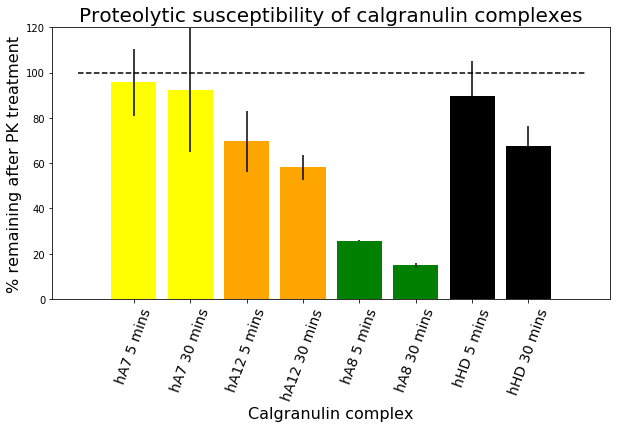

In [72]:
datasets = [percentages1, percentages2]
labels = ["hA7 5 mins", "hA7 30 mins", "hA12 5 mins", "hA12 30 mins", "hA8 5 mins", "hA8 30 mins", "hHD 5 mins", "hHD 30 mins"]
colorlist = ["yellow", "yellow", "orange", "orange", "green", "green", "black", "black"]



df = summary_plotter(datasets, labels, colorlist)